# Proyek Analisis Data: [Bike Sharing Dataset]
* **Nama:** Cinta Chantika Lestari
* **Email:** cintachantika13@gmail.com
* **ID Dicoding:** cintaachantikaa

## Menentukan Pertanyaan Bisnis
- Apakah ada korelasi antara suhu yang dirasakan (atemp) dan jumlah sewa sepeda (cnt)?
> Suhu yang dirasakan (atemp) menggambarkan bagaimana suhu dirasakan oleh manusia, bukan hanya suhu udara sebenarnya. Faktor seperti kelembapan dan angin mempengaruhi kenyamanan pengguna sepeda lebih dari suhu aktual. Maka, akan digunakan atemp daripada temp. Dijelaskan dengan visualisasi data yang berisi apakah suhu yang dirasakan oleh pengguna memiliki pengaruh yang terhadap jumlah penyewaan sepeda.
> Dengan menganalisis data ini, perusahaan dapat mengetahui kapan harus mengantisipasi permintaan dan menyesuaikan operasi mereka.
- Bagaimana distribusi jumlah sewa sepeda (cnt) berdasarkan musim (season)?
> Menjelaskan dengan visualisasi data untuk mengetahui musim mana yang paling populer untuk penyewaan sepeda.
> Dengan menganalisis data ini, perusahaan dapat melakukan penyesuaian strategi pemasaran sesuai dengan musim yang sedang/akan berlangsung.


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data diambil dari sistem Capital Bikeshare di Washington D.C. untuk tahun 2011 dan 2012, dengan informasi cuaca tambahan dari freemeteo.com.
- Dataset terdiri dari dua file utama, hour.csv dan day.csv, yang mencakup informasi seperti tanggal, musim, tahun, bulan, jam, hari libur, hari kerja, kondisi cuaca, suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda.
- _Normalisasi Data_: Data suhu, suhu yang dirasakan, kelembaban, dan kecepatan angin telah dinormalisasi untuk keseragaman, dengan faktor skala tertentu untuk mengembalikan ke nilai aslinya.
- Dataset ini mencakup fitur musim yang memungkinkan kita untuk mengelompokkan data penyewaan sepeda berdasarkan musim (semi, panas, gugur, dingin).
- Dataset ini secara eksplisit mencakup fitur atemp (suhu yang dirasakan) dan cnt (jumlah total penyewaan sepeda), yang memungkinkan analisis korelasi langsung.

### Assessing Data

#### Menilai tabel ```day_df```

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:** 
- Dtype dteday yang perlu diubah dari object ke datetime saat dilakukan _data cleaning_
- Jumlah non-null count yang konsisten, maka kemungkinan besar tidak ada data yang null.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** Tidak ada data yang _null_.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:** Tidak ada duplikasi data dan _outlier_

#### Menilai tabel ```hour_df```

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:** 
- Dtype dteday yang perlu diubah dari object ke datetime saat dilakukan _data cleaning_.
- Jumlah non-null count yang konsisten, maka kemungkinan besar tidak ada data yang _null_.

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** Tidak ada data yang _null_.

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** Tidak ada duplikasi data dan _outlier_

### Cleaning Data

#### Membersihkan data ```day_df```
Note : Tidak dilakukan _cleaning duplicates_ dan _missing values_ karena tidak terdapat duplikasi data dan data _null_


In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
day_df['atemp'] = day_df['atemp'] * 50
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,18.18125,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,17.68695,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,9.47025,0.437273,0.248309,120,1229,1349


**Insight:** atemp diubah menjadi Celcius, temp dan hum dibiarkan saja karena tidak akan digunakan dalam EDA dan Explanatory.

#### Membersihkan data ```hour_df```
Note : Tidak dilakukan _cleaning duplicates_ dan _missing values_ karena tidak terdapat duplikasi data dan data _null_

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:** _Data type_ telah diganti dari object menjadi datetime untuk kedua dataset

In [13]:
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,14.395,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,13.635,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,13.635,0.80,0.0,5,27,32


**Insight:** atemp diubah menjadi Celcius, temp dan hum dibiarkan saja karena tidak akan digunakan dalam EDA dan Explanatory.

## Exploratory Data Analysis (EDA)


### Explore ```day_df```

In [14]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
675,676,2012-11-06,4,1,11,0,2,1,1,0.280833,14.07835,0.567083,0.173513,466,5220,5686
295,296,2011-10-23,4,0,10,0,0,0,1,0.421667,21.11665,0.741250,0.099513,1619,2762,4381
116,117,2011-04-27,2,0,4,0,3,1,2,0.620000,28.75710,0.835417,0.312200,547,3325,3872
561,562,2012-07-15,3,1,7,0,0,0,1,0.745833,35.25980,0.717917,0.166667,1920,4111,6031
150,151,2011-05-31,2,0,5,0,2,1,1,0.775000,36.26915,0.636667,0.111329,673,3309,3982


In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,23.717699,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,3.953480,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,16.892125,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,24.336650,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,30.430100,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,42.044800,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,8.148059,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
print("Jumlah unik dteday:", day_df['dteday'].nunique()) #Menghitung jumlah hari yang tercatat dalam dataset

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe())

Jumlah unik dteday: 731

Statistik deskriptif:
               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987     23.788755      0.627229      0.190098     35.676218   
std        0.192556      8.592511      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000     16.665000      0.480000      0.104500      4.000000   
50%        0.500000     24.240000      0.630000      0.194000     17.000000   
75%        0.660000     31.060000      0.780000      0.253700     48.000000   
max        1.000000     50.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    14

**Insight:** Mengetahui banyak hari yang dicatat dalam dataset, dalam atribut 'dteday' terdapat 731 data hari yang tercatat

In [17]:
# Statistik deskriptif untuk hari libur
print("Statistik deskriptif jumlah sewa (cnt) pada hari libur:")
print(day_df[day_df['holiday'] == 1]['cnt'].describe())

# Statistik deskriptif untuk hari kerja
print("\nStatistik deskriptif jumlah sewa (cnt) pada hari kerja:")
print(day_df[day_df['workingday'] == 1]['cnt'].describe())

Statistik deskriptif jumlah sewa (cnt) pada hari libur:
count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: cnt, dtype: float64

Statistik deskriptif jumlah sewa (cnt) pada hari kerja:
count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: cnt, dtype: float64


**Insight:** Statistik deskriptif yang didapatkan mencerminkan pola penggunaan/sewa sepeda harian pada hari libur dan hari kerja. Dari statistik tersebut, terdapat perbedaan signifikan dalam jumlah sewa sepeda antara di hari libur dan hari kerja. Dapat dilihat pada count, mean, dan max bahwa peminjaman lebih umum dilakukan pada hari kerja berdasakan dataset. Namun, nilai min menunjukkan bahwa pada beberapa hari kerja, jumlah penyewaan sepeda bisa sangat rendah.
Hal ini dapat dipengaruhi cuaca, aktivitas, dan event tertentu.

In [18]:
# Berdasarkan month dari dteday
# Ekstraksi bulan dari dteday
day_df['month'] = pd.to_datetime(day_df['dteday']).dt.month

# Pemetaan bulan ke musim (clustering)
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

day_df['season_name'] = day_df['month'].apply(get_season)

#Berdasarkan season
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

# Cek apabila distribusi musim sinkron/sama
print("Distribusi musim berdasar 'dteday':")
print(day_df['season_name'].value_counts())
print("Distribusi musim berdasar 'season':")
print(day_df['season'].map(season_map).value_counts())
day_df.head(3)

Distribusi musim berdasar 'dteday':
season_name
Spring    184
Summer    184
Fall      182
Winter    181
Name: count, dtype: int64
Distribusi musim berdasar 'season':
season
Summer    188
Spring    184
Winter    181
Fall      178
Name: count, dtype: int64


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,season_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,18.18125,0.805833,0.160446,331,654,985,1,Winter
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,17.68695,0.696087,0.248539,131,670,801,1,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,9.47025,0.437273,0.248309,120,1229,1349,1,Winter


**Insight:** 
- Telah dilakukan _clustering_ dari data ```day_df``` terkait musim perhari yang tercatat di dalam dataset, yaitu dibagi menjadi Spring, Summer, Fall, dan Winter.
- Ketika dibandingkan distribusi musim berdasar dteday dan season, ditunjukkan nilai yang ternyata agak berbeda.
- Temuan perbedaan distribusi ini dapat disebabkan oleh zona waktu/wilayah geografis yang berbeda, atau faktor perbatasan musim yang berbeda; yakni berdasar kondisi cuaca aktual vs definisi kalender.
- Maka, untuk penggunaan data musim/_season_ yang berikutnya, akan digunakan data '_season_' yang merupakan klasifikasi resmi dalam dataset.

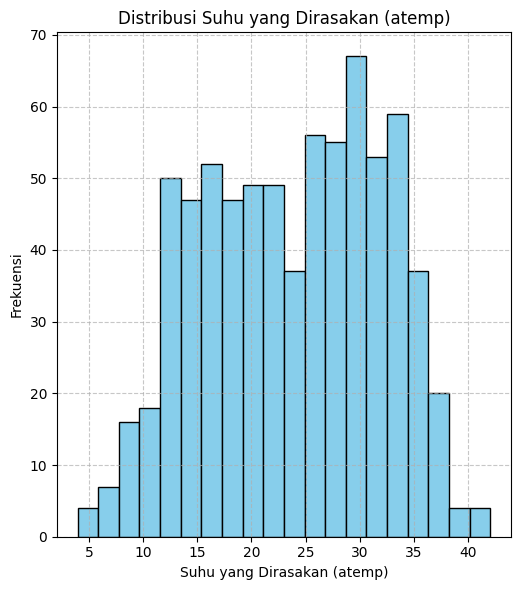

In [19]:
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(day_df['atemp'], bins=20, color='skyblue', edgecolor='black')
#plt.hist() secara otomatis menghitung frekuensi dengan membagi range data mjd 20 bin
plt.title('Distribusi Suhu yang Dirasakan (atemp)')
plt.xlabel('Suhu yang Dirasakan (atemp)')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:** 
- Ditampilkan distribusi frekuensi dari suhu yang dirasakan (atemp) harian (rata-rata atau agregasi harian).
- Dengan menggunakan ```day_df```, diberikan gambaran yang lebih bersih tentang tren suhu secara keseluruhan dan dapat mengurangi "_noise_" dari fluktuasi per jam.

### Explore ```hour_df```

In [20]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6038,6039,2011-09-14,3,0,9,4,0,3,1,1,0.60,28.030,0.83,0.0896,1,8,9
16930,16931,2012-12-13,4,1,12,5,0,4,1,2,0.26,12.880,0.56,0.1642,2,31,33
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,13.635,0.80,0.0000,2,0,2
14125,14126,2012-08-16,3,1,8,18,0,4,1,1,0.80,35.605,0.36,0.0000,109,723,832
6688,6689,2011-10-11,4,0,10,6,0,2,1,1,0.52,25.000,0.83,0.0896,9,114,123


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,23.788755,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,16.665000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,24.240000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,31.060000,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,50.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,8.592511,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
print("Jumlah unik dteday:", hour_df['dteday'].nunique()) #Menghitung jumlah hari yang tercatat dalam dataset
print("Jumlah unik hr:", hour_df['hr'].nunique()) #Menghitung jumlah jam yang dicatat tiap harinya dalam dataset; seharusnya sebanyak 24 jam

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe())

Jumlah unik dteday: 731
Jumlah unik hr: 24

Statistik deskriptif:
               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987     23.788755      0.627229      0.190098     35.676218   
std        0.192556      8.592511      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000     16.665000      0.480000      0.104500      4.000000   
50%        0.500000     24.240000      0.630000      0.194000     17.000000   
75%        0.660000     31.060000      0.780000      0.253700     48.000000   
max        1.000000     50.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%   

**Insight:** Mengetahui banyak hari dan jam yang dicatat dalam dataset, dalam atribut 'dteday' terdapat 731 data hari yang tercatat (konsisten dengan date_df). Juga, dalam atribut 'hr' terdapat 24 jam dalam sehari yang tercatat.

In [23]:
# Statistik deskriptif untuk hari libur
print("Statistik deskriptif jumlah sewa (cnt) pada hari libur:")
print(hour_df[hour_df['holiday'] == 1]['cnt'].describe())

# Statistik deskriptif untuk hari kerja
print("\nStatistik deskriptif jumlah sewa (cnt) pada hari kerja:")
print(hour_df[hour_df['workingday'] == 1]['cnt'].describe())

Statistik deskriptif jumlah sewa (cnt) pada hari libur:
count    500.000000
mean     156.870000
std      156.757478
min        1.000000
25%       28.750000
50%       97.000000
75%      253.250000
max      712.000000
Name: cnt, dtype: float64

Statistik deskriptif jumlah sewa (cnt) pada hari kerja:
count    11865.000000
mean       193.207754
std        185.107477
min          1.000000
25%         40.000000
50%        151.000000
75%        277.000000
max        977.000000
Name: cnt, dtype: float64


**Insight:** Statistik deskriptif yang didapatkan mencerminkan pola penggunaan/sewa sepeda per jam pada hari libur dan hari kerja. Dari statistik tersebut, terdapat perbedaan signifikan dalam jumlah sewa sepeda antara di hari libur dan hari kerja. Dapat dilihat pada count, mean, dan max bahwa peminjaman lebih umum dilakukan pada hari kerja berdasakan dataset. Namun, nilai min menunjukkan nilai yang sama pada hari libur dan hari kerja yakni 1, yang berarti jumlah minimal penggunaan/sewa yang hanya ada satu pada jam tertentu baik pada hari libur atau hari kerja.

In [24]:
# Berdasarkan month dari dteday
# Ekstraksi bulan dari dteday
hour_df['month'] = pd.to_datetime(hour_df['dteday']).dt.month

# Pemetaan bulan ke musim (clustering)
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

hour_df['season_name'] = hour_df['month'].apply(get_season)

# Berdasarkan season
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

# Cek apabila distribusi musim sinkron/sama
print("Distribusi musim berdasar 'dteday':")
print(hour_df['season_name'].value_counts())
print("Distribusi musim berdasar 'season':")
print(hour_df['season'].map(season_map).value_counts())
hour_df.head(3)

Distribusi musim berdasar 'dteday':
season_name
Summer    4403
Spring    4398
Fall      4325
Winter    4253
Name: count, dtype: int64
Distribusi musim berdasar 'season':
season
Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: count, dtype: int64


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,season_name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,14.395,0.81,0.0,3,13,16,1,Winter
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,13.635,0.80,0.0,8,32,40,1,Winter
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,13.635,0.80,0.0,5,27,32,1,Winter


**Insight:** 
- Telah dilakukan _clustering_ dari data ```hour_df``` terkait musim tiap jamnya yang tercatat di dalam dataset, yaitu dibagi menjadi Spring, Summer, Fall, dan Winter.
- Sama dengan data ```day_df```, ketika dibandingkan distribusi musim berdasar dteday dan season, ditunjukkan nilai yang ternyata berbeda.
- Temuan perbedaan distribusi ini dapat disebabkan oleh zona waktu/wilayah geografis yang berbeda, atau faktor perbatasan musim yang berbeda; yakni berdasar kondisi cuaca aktual vs definisi kalender.
- Maka, untuk penggunaan data musim/_season_ yang berikutnya, akan digunakan data '_season_' yang merupakan klasifikasi resmi dalam dataset.

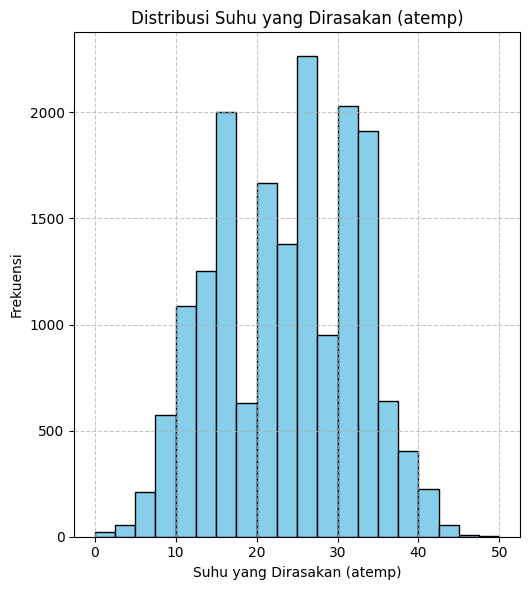

In [25]:
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(hour_df['atemp'], bins=20, color='skyblue', edgecolor='black')
# plt.hist() secara otomatis menghitung frekuansi dengan membagi range data mjd 20 bin
plt.title('Distribusi Suhu yang Dirasakan (atemp)')
plt.xlabel('Suhu yang Dirasakan (atemp)')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:** 
- Ditampilkan distribusi frekuensi dari suhu yang dirasakan (atemp) per jam.
- Dengan menggunakan ```hour_df```, diberikan gambaran yang lebih lebih detail tentang variasi suhu sepanjang hari, dan bagaimana berubah dari jam ke jam.

### Explore ```day_df``` dan ```hour_df```

Menggabungkan data ```day_df``` dan ```hour_df```

In [26]:
bike_df = pd.merge(
left=hour_df, 
right=day_df,
how="left", 
on='dteday', 
suffixes=('_hour', '_day')
)
# Filter hanya kolom yang akan digunakan
columns_to_keep = [
    'dteday', 'hr', 'season_hour', 'atemp_hour', 'cnt_hour', 
    'workingday_hour', 'holiday_hour', 'weathersit_hour',
    'casual_hour', 'registered_hour', 'temp_hour', 'hum_hour', 'windspeed_hour'
]
bike_df = bike_df[columns_to_keep]
bike_df.columns = [col.replace('_hour', '') if col.endswith('_hour') else col for col in bike_df.columns] # Hilangkan kata _hour

# Transformasi musim menggunakan season_map
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
bike_df['season_name'] = bike_df['season'].map(season_map)

print(bike_df['season_name'].value_counts()) # Cek apabila jumlah season sama dengan hour_df berdasar 'season'
bike_df.head()

season_name
Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: count, dtype: int64


,dteday,hr,season,atemp,cnt,workingday,holiday,weathersit,casual,registered,temp,hum,windspeed,season_name
0,2011-01-01,0,1,14.395,16,0,0,1,3,13,0.24,0.81,0.0,Winter
1,2011-01-01,1,1,13.635,40,0,0,1,8,32,0.22,0.80,0.0,Winter
2,2011-01-01,2,1,13.635,32,0,0,1,5,27,0.22,0.80,0.0,Winter
3,2011-01-01,3,1,14.395,13,0,0,1,3,10,0.24,0.75,0.0,Winter
4,2011-01-01,4,1,14.395,1,0,0,1,0,1,0.24,0.75,0.0,Winter


_Export_

In [27]:
#bike_df.to_csv("bike_df.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada korelasi antara suhu yang dirasakan (atemp) dan jumlah sewa sepeda (cnt)?

In [28]:
bike_df.sample(5)

,dteday,hr,season,atemp,cnt,workingday,holiday,weathersit,casual,registered,temp,hum,windspeed,season_name
13478,2012-07-20,19,3,28.790,402,1,0,2,44,358,0.64,0.83,0.2836,Summer
5668,2011-08-29,15,3,31.820,220,1,0,1,56,164,0.70,0.42,0.1642,Summer
9389,2012-02-01,3,1,21.970,3,1,0,1,0,3,0.44,0.44,0.1940,Winter
8132,2011-12-10,12,4,14.395,283,0,0,1,48,235,0.32,0.45,0.4179,Fall
15950,2012-11-02,7,4,15.150,357,1,0,2,8,349,0.30,0.70,0.1343,Fall


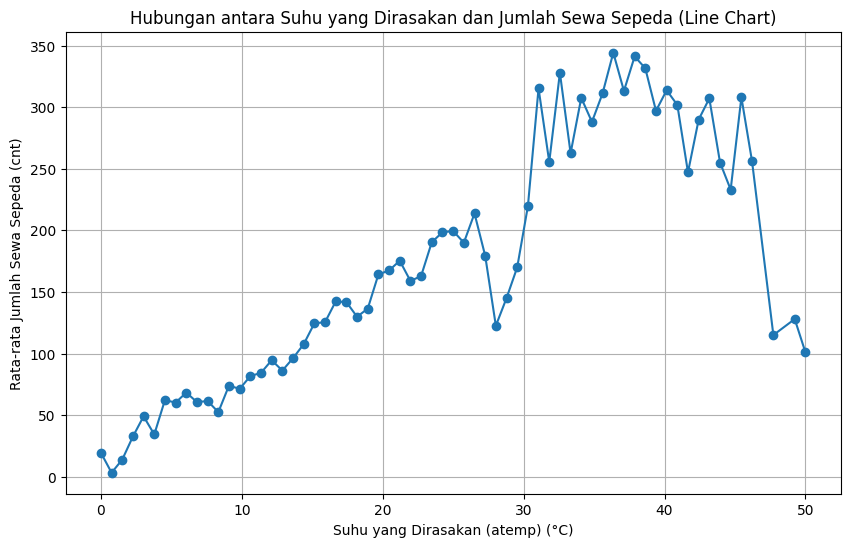

In [29]:
# Visualisasi dengan line chart
plt.figure(figsize=(10, 6))
plt.plot(bike_df.groupby('atemp')['cnt'].mean(), marker='o')
plt.title('Hubungan antara Suhu yang Dirasakan dan Jumlah Sewa Sepeda (Line Chart)')
plt.xlabel('Suhu yang Dirasakan (atemp) (°C)')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda (cnt)')
plt.grid(True)
plt.show()

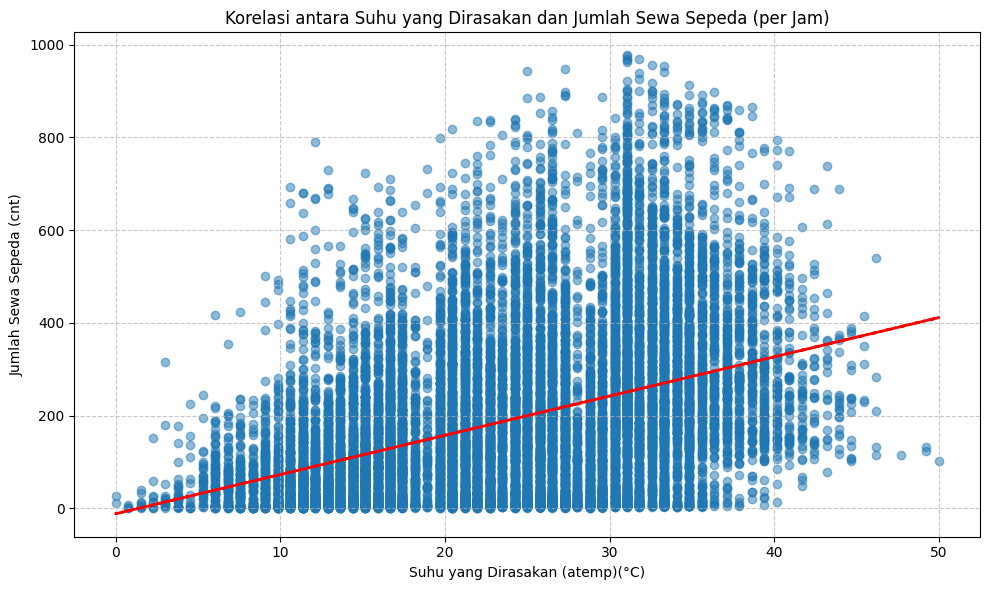

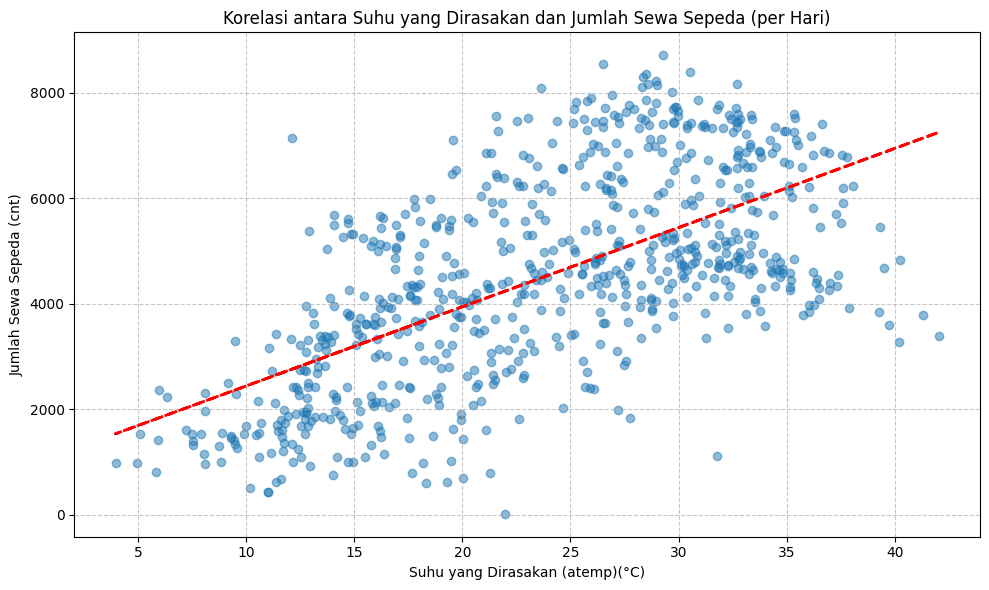

In [30]:
# Untuk mengetahui ada-tidaknya korelasi, kita akan menggunakan visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bike_df['atemp'], bike_df['cnt'], alpha=0.5)
plt.title('Korelasi antara Suhu yang Dirasakan dan Jumlah Sewa Sepeda (per Jam)')
plt.xlabel('Suhu yang Dirasakan (atemp)(°C)')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.grid(True, linestyle='--', alpha=0.7)

# Tambahkan garis regresi
z = np.polyfit(bike_df['atemp'], bike_df['cnt'], 1)
p = np.poly1d(z)
plt.plot(bike_df['atemp'], p(bike_df['atemp']), "r--", linewidth=2)

plt.tight_layout()
plt.show()

# Sebagai informasi tambahan dan visualisasi yang lebih clean, ditampilkan scatter plot berdasarkan rata-rata/regresi suhu yang dirasakan per hari
# dan jumlah sewa sepeda
plt.figure(figsize=(10, 6))
plt.scatter(day_df['atemp'], day_df['cnt'], alpha=0.5)
plt.title('Korelasi antara Suhu yang Dirasakan dan Jumlah Sewa Sepeda (per Hari)')
plt.xlabel('Suhu yang Dirasakan (atemp)(°C)')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.grid(True, linestyle='--', alpha=0.7)

# Tambahkan garis regresi
z = np.polyfit(day_df['atemp'], day_df['cnt'], 1)
p = np.poly1d(z)
plt.plot(day_df['atemp'], p(day_df['atemp']), "r--", linewidth=2)

plt.tight_layout()
plt.show()

**Insight:** Telah dilakukan visualisasi data menggunakan _line chart_ dan _scatter plot_ untuk menggambarkan dan mengetahui korelasi yang ada antara suhu yang dirasakan pengguna dan jumlah sewa sepeda.

### Pertanyaan 2: Bagaimana distribusi jumlah sewa sepeda (cnt) berdasarkan musim (season)?

In [31]:
bike_df.head()

,dteday,hr,season,atemp,cnt,workingday,holiday,weathersit,casual,registered,temp,hum,windspeed,season_name
0,2011-01-01,0,1,14.395,16,0,0,1,3,13,0.24,0.81,0.0,Winter
1,2011-01-01,1,1,13.635,40,0,0,1,8,32,0.22,0.80,0.0,Winter
2,2011-01-01,2,1,13.635,32,0,0,1,5,27,0.22,0.80,0.0,Winter
3,2011-01-01,3,1,14.395,13,0,0,1,3,10,0.24,0.75,0.0,Winter
4,2011-01-01,4,1,14.395,1,0,0,1,0,1,0.24,0.75,0.0,Winter


In [32]:
# Kelompokkan jumlah sewa (cnt) berdasarkan musim (season)
season_cnt = bike_df.groupby('season')['cnt'].sum()
print(season_cnt)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


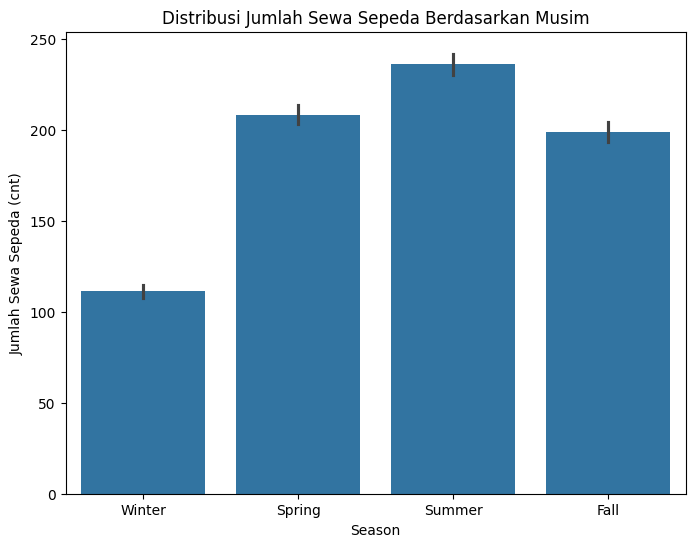

In [33]:
# Visualisasi distribusi menggunakan bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bike_df['season_name'], y=bike_df['cnt'])
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.show()

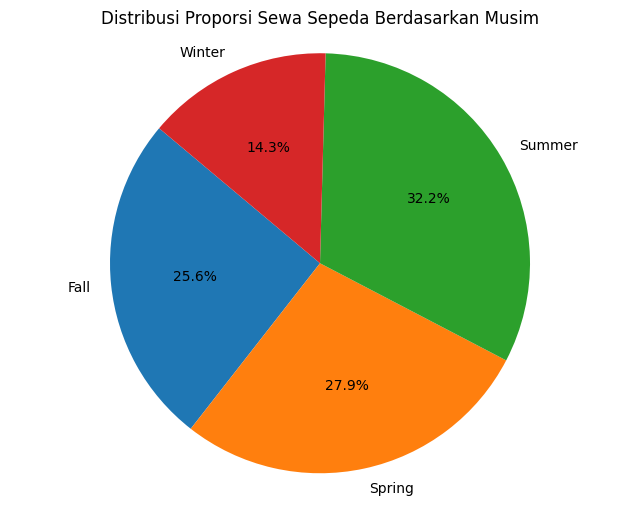

In [34]:
# Kelompokkan jumlah sewa (cnt) berdasarkan musim (season)
season_cnt = bike_df.groupby('season_name')['cnt'].sum()
# Visualisasi persentase penyewaan sepeda berdasarkan musim menggunakan pie chart
plt.figure(figsize=(8, 6))
plt.pie(season_cnt, labels=season_cnt.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribusi Proporsi Sewa Sepeda Berdasarkan Musim')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

## Analisis Lanjutan (Opsional)

### Rata-rata penyewaan sepeda berdasarkan waktu penyewaan sepeda (jam sibuk vs non-sibuk)


Rata-Rata Penyewaan Sepeda berdasarkan Waktu Penyewaan:
time_period
Late night (00:00-05:00)       24.908559
Morning rush (06:00-09:00)    216.704061
Midday (10:00-15:00)          230.192493
Evening rush (16:00-19:00)    377.629973
Evening (20:00-23:00)         154.377747
Name: cnt, dtype: float64


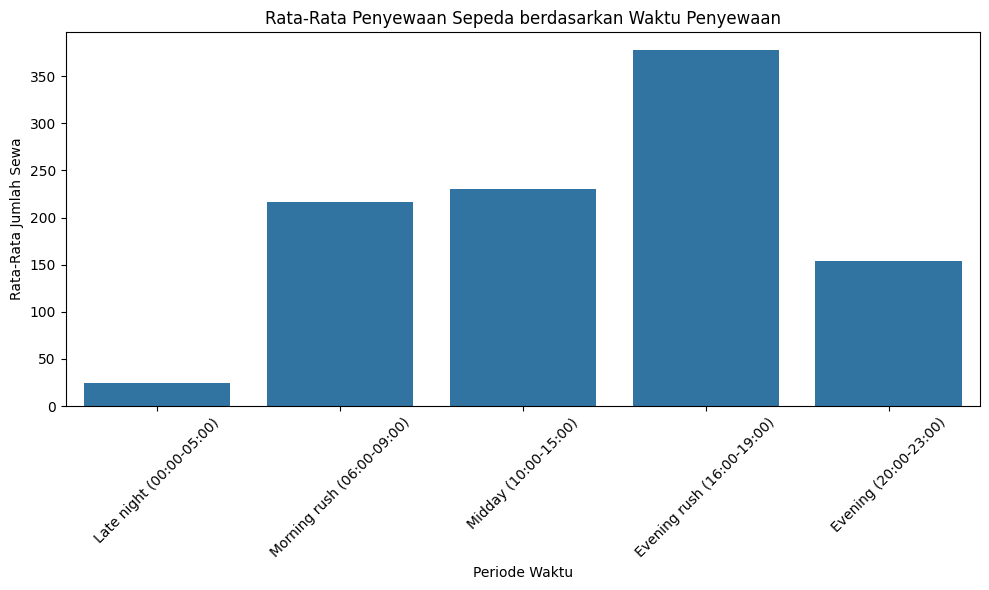

In [35]:
# Clustering time_label berdasarkan data 'hr'
time_bins = [0, 6, 10, 16, 20, 24]
time_labels = ['Late night (00:00-05:00)', 'Morning rush (06:00-09:00)', 'Midday (10:00-15:00)', 'Evening rush (16:00-19:00)', 'Evening (20:00-23:00)',]

# Buat kolom time_period
bike_df['time_period'] = pd.cut(bike_df['hr'], bins=time_bins, labels=time_labels, right=False)

# Menganalisis rata-rata jumlah penyewaan berdasarkan time_period
average_rentals = bike_df.groupby('time_period', observed=True)['cnt'].mean().reindex(time_labels)
print("\nRata-Rata Penyewaan Sepeda berdasarkan Waktu Penyewaan:")
print(average_rentals)

# Visualisasi menggunakan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rentals.index, y=average_rentals.values, order=time_labels)
plt.title('Rata-Rata Penyewaan Sepeda berdasarkan Waktu Penyewaan')
plt.xlabel('Periode Waktu')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight & Conclusion:** 
- Dari visualisasi data yang dibuat, ditunjukkan bahwa rata-rata penyewaan sepeda paling tinggi berada pada jam evening rush, yakni pada pukul 16:00 sampai 19:00, dengan rata-rata di time_period tersebut sebanyak 377,63 penyewaan sepeda. Sedangkan, yang terendah adalah saat late night, yakni pada pukul 00:00 sampai 05:00.
- Hal ini masuk akal karena intensitas aktivitas pengguna dan keperluan mobilitasnya yang tentunya berbeda jauh antara saat late night dan evening rush.

## Conclusion

- Conclusion pertanyaan 1:
    >- Jumlah penyewaan meningkat seiring dengan kenaikan suhu hingga mencapai puncaknya di sekitar nilai ```atemp``` 30 - 40 °C.
    >- Setelah titik tertentu (mendekati 50°C), jumlah penyewaan justru menurun drastis, menunjukkan bahwa suhu yang terlalu tinggi mungkin mengurangi minat pengguna untuk menyewa sepeda.
    >- Terdapat korelasi positif, ditunjukkan oleh garis regresi merah yang meningkat ke kanan pada scatter plot. Ini berarti semakin tinggi suhu yang dirasakan, semakin banyak sepeda yang disewa.
    >- Namun, ada sebaran yang cukup luas di scatter plot, yang menunjukkan faktor lain selain suhu yang memengaruhi jumlah penyewaan.


- Conclusion pertanyaan 2:
    >- Berdasarkan bar chart dan pie chart, ditunjukkan bahwa permintaan sewa sepeda lebih tinggi pada musim panas/_summer_, dan yang paling rendah adalah saat musim dingin/_winter_.
    >- Biasanya musim panas/_summer_ diharapkan menjadi puncak penggunaan sepeda, dikarenakan aktivitas _outdoor_ yang lebih sering dilakukkan, dan saat musim dingin cenderung aktivitas yang memerlukan mobilitas menurun.
    >- Rekomendasi : Bisnis penyewaan sepeda dapat memanfaatkan puncak permintaan di musim panas/_summer_ dengan menyediakan lebih banyak unit atau promosi khusus, dan di musim dingin/_winter_, mungkin perlu ada strategi pemasaran khusus untuk meningkatkan jumlah penyewaan, seperti diskon atau event sepeda.